In [1]:
##Importing libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
dataf = pd.read_csv("C:/Users/abhay/OneDrive/Desktop/Machine Learning Work/Loan Prediction/clustering.csv")

In [3]:
dataf.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [4]:
dataf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
##Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataf.describe())

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,-1.110223e-16,5.551115e-17,7.285839e-17,-2.220446e-16,4.163336e-17
std,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00
min,-1.068494e+00,-4.687090e-01,-1.089169e+00,-1.849007e+00,-3.843843e-01
25%,-7.125058e-01,-4.424701e-01,-4.735516e-01,-1.386512e-01,-3.781640e-01
50%,-7.588856e-02,-3.649344e-01,-1.647199e-01,4.333390e-01,-3.757515e-01
75%,2.026626e-01,-2.761337e-01,7.233549e-02,4.497351e-01,-3.757515e-01
max,2.298224e+00,2.638365e+00,2.402383e+00,1.220355e+00,2.645739e+00


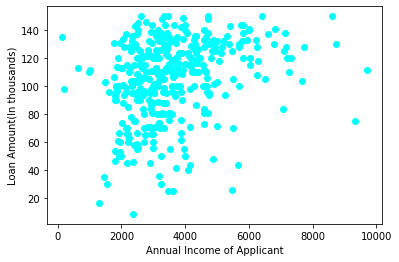

In [6]:
#Choosing two features for visualization
x = dataf[['LoanAmount','ApplicantIncome']]
plt.scatter(x['ApplicantIncome'], x['LoanAmount'], c = 'cyan')
plt.xlabel('Annual Income of Applicant')
plt.ylabel('Loan Amount(In thousands)')
plt.show()

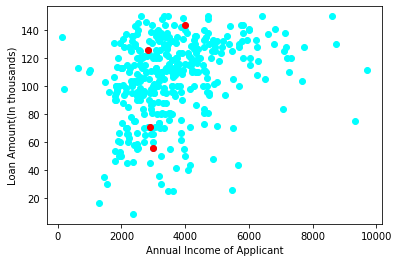

In [7]:
#Step1--Choosing numbers of clusters(K) and Step2--select random centroids

K=4

#select random observations
Centroids = (x.sample(n=K))
plt.scatter(x['ApplicantIncome'], x['LoanAmount'], c = 'cyan')
plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'], c = 'red')
plt.xlabel('Annual Income of Applicant')
plt.ylabel('Loan Amount(In thousands)')
plt.show()

In [8]:
##step3--assigning all the points to closest cluster centroids

diff = 1
j = 0

while(diff!=0):
    Xdis = x
    i = 1
    for index1, row_c in Centroids.iterrows():
        Euclid_dis = []
        for index2, row_d in Xdis.iterrows():
            d1 = (row_c['ApplicantIncome']-row_d['ApplicantIncome'])**2
            d2 = (row_c['LoanAmount']-row_d['LoanAmount'])**2
            dis = np.sqrt(d1+d2)
            Euclid_dis.append(dis)
        x[i] = Euclid_dis
        i = i+1
        
    c = []
    for index, row in x.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                pos = i+1
        c.append(pos)
    x['Cluster'] = c
    #Step4--recomputing centrois of new clusters
    centroids_new = x.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = x.groupby(['Cluster']).mean()[['LoanAmount', 'ApplicantIncome']]
    
    ##Step5--Repeat step3 & step4

C:\Users\abhay\AppData\Local\Continuum\anaconda4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\abhay\AppData\Local\Continuum\anaconda4\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


314.0127821626079
119.19251707570389
-18.15206674000831
-69.94524902855534
-36.43865664910045
-12.492385444743917
0.0


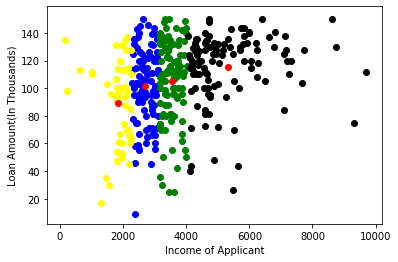

In [9]:
color = ['blue', 'green', 'black', 'yellow']
for k in range(K):
    data = x[x['Cluster']==k+1]
    plt.scatter(data['ApplicantIncome'], data['LoanAmount'], c=color[k])
plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'], c='red')
plt.xlabel('Income of Applicant')
plt.ylabel('Loan Amount(In Thousands)')
plt.show()